In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv('C:/Users/b01297ar/Documents/ProstateMRL-local/ProstateMRL-Radiomics/Paper1-Release/Features_ManualRS.csv')
df = df.drop(['Unnamed: 0'], axis=1)

In [19]:
df.sample(5)

,PatID,Fraction,Contour,ContourType,Feature,FeatureValue
7463,1307,2,MS,Manual,shape_MeshVolume,0.137476
7240,752,4,MS,Manual,ngtdm_Busyness,0.194622
5903,653,2,RP,Manual,firstorder_Range,0.409274
7091,752,3,MS,Manual,glrlm_GrayLevelVariance,0.156730
9771,1431,4,RP,Manual,shape_Maximum2DDiameterSlice,0.827896


In [20]:
patIDs = df['PatID'].unique()
rand_pats = np.random.choice(patIDs, 1, replace=False)
df_plot = df[df['PatID'].isin(rand_pats)]
# df_plot['Feature'] = df_plot['Group'] + '_' + df_plot['Feature']

fts = df_plot['Feature'].unique()
rand_fts = np.random.choice(fts, 2, replace=False)


c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  if sys.path[0] == "":
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


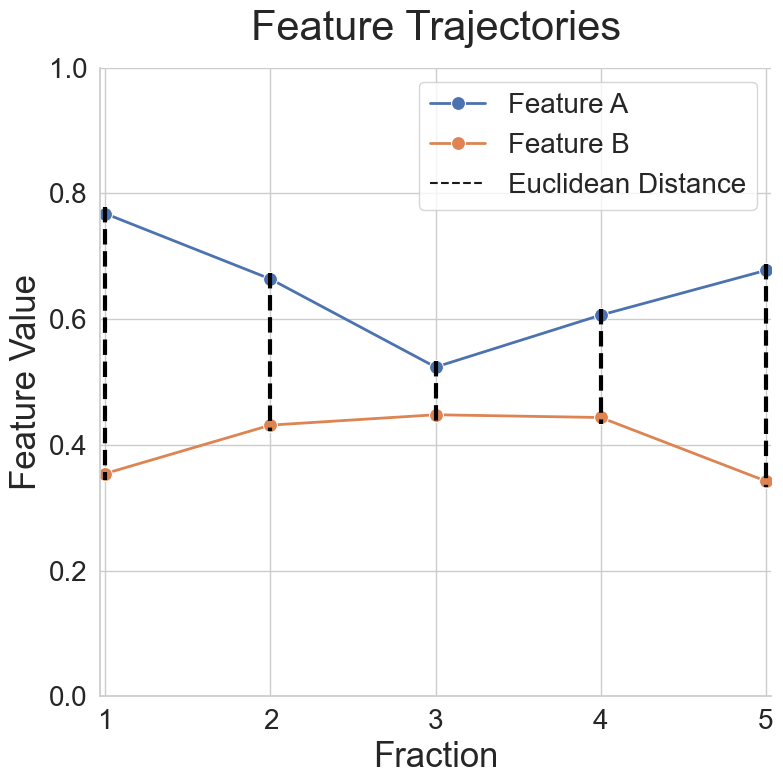

In [21]:
df_plot = df_plot.loc[df_plot['Feature'].isin(fts)]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_context("paper", font_scale=1.5)
sns.set_theme(style="whitegrid", rc=custom_params)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# plot
sns.lineplot(data = df_plot.loc[df_plot['Feature'] == rand_fts[0]], x = 'Fraction', y='FeatureValue',
              ax=ax, label='Feature A', linewidth=2, legend=True, palette='muted', marker='o', markersize=10)
#sns.scatterplot(data = df_plot.loc[df_plot['Feature'] == fts[0]], x = 'Fraction', y='FeatureValue', ax=ax, s=100, legend=True, palette='muted')

sns.lineplot(data = df_plot.loc[df_plot['Feature'] == rand_fts[1]], x = 'Fraction', y='FeatureValue',
              ax=ax, label='Feature B', linewidth=2, legend=True, palette='muted', marker='o', markersize=10)
#sns.scatterplot(data = df_plot.loc[df_plot['Feature'] == fts[1]], x = 'Fraction', y='FeatureValue', ax=ax, s=100, legend=True, palette='muted')

ax.set_xlabel('Fraction', fontsize=25)
ax.set_ylabel('Feature Value', fontsize=25)
ax.set_xlim([0.97, 5.03])
ax.set_ylim([0, 1.0])
ax.set_xticks(np.arange(1, 5.1, 1))
ax.set_xticklabels(np.arange(1, 6, 1), fontsize=20)
ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=20)
ax.set_title('Feature Trajectories', fontsize=30, pad=20)
# ax.set_ylim([0, 1.05])


y_vals1 = df_plot.loc[df_plot['Feature'] == rand_fts[0]]['FeatureValue'].values + 0.01
y_vals2 = df_plot.loc[df_plot['Feature'] == rand_fts[1]]['FeatureValue'].values - 0.01

for i in range(1, 6):
    ax.vlines(i, y_vals1[i-1], y_vals2[i-1], color='black', linestyle='dashed', linewidth=3)
# add in dashed line to legend
ax.plot([], [], 'k--', label='Euclidean Distance', linewidth=1.5)
ax.legend(fontsize=20, loc='upper right')
#sns.set_theme(style="ticks", rc=custom_params)

# for axis in ['bottom','left']:
#     ax.spines[axis].set_linewidth(2)
#     ax.spines[axis].set_color('black')
plt.tight_layout()
plt.savefig('./LinePlotED4.png', dpi=300)
